# FEATURE IMPORTANCES

In [1]:
# load data and split train and test
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(
  n_samples=1000,
  n_features=10,
  n_informative=3,
  n_redundant=0,
  n_repeated=0,
  n_classes=2,
  random_state=0,
  shuffle=False
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [2]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
features = [f"feature_{i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Mean Decrease Impurity (MDI)

In [3]:
# Importances based on "mean decrease impurity"
import numpy as np
importances = forest.feature_importances_
for name, importance in zip(features, importances):
  print(name, importance)
std = np.std(importances, axis=0)
print(std)

feature_0 0.2094427633239727
feature_1 0.3178723427707689
feature_2 0.1951896217693895
feature_3 0.04039264936885962
feature_4 0.03860916704791641
feature_5 0.03406562574630808
feature_6 0.040255129476406304
feature_7 0.042573296917871074
feature_8 0.04001829840667822
feature_9 0.04158110517182901
0.09698154473341276


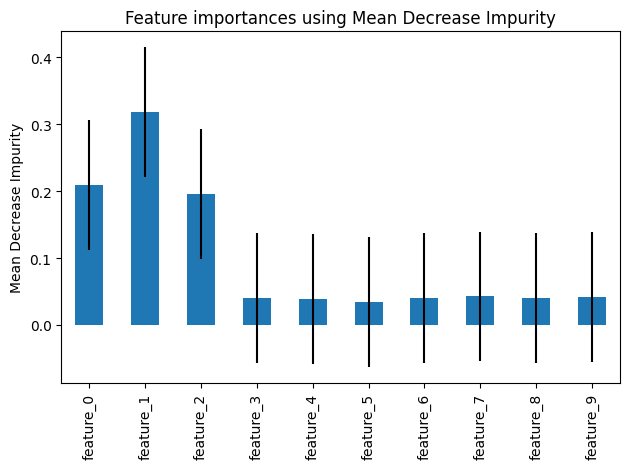

In [4]:
# plot
from matplotlib import pyplot as plt
import pandas as pd


forest_importances_serie = pd.Series(importances, index=features)
fig, ax = plt.subplots()
forest_importances_serie.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using Mean Decrease Impurity')
ax.set_ylabel('Mean Decrease Impurity')
fig.tight_layout()

### Permutation

In [5]:
# Permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
importances_p = result.importances_mean

<Axes: >

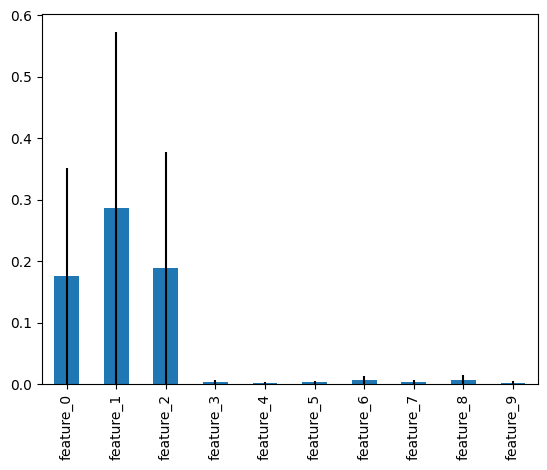

In [6]:
# plot
importances_p_serie = pd.Series(importances_p, index=features)
fig, ax = plt.subplots()
importances_p_serie.plot.bar(yerr=importances_p, ax=ax)